In [1]:
import ahkab
from ahkab import circuit, printing, time_functions

mycircuit = circuit.Circuit(title="Butterworth Example circuit")

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


In [2]:
gnd = mycircuit.get_ground_node()

In [3]:
mycircuit.add_resistor("R1", n1="n1", n2="n2", value=600)
mycircuit.add_inductor("L1", n1="n2", n2="n3", value=15.24e-3)
mycircuit.add_capacitor("C1", n1="n3", n2=gnd, value=119.37e-9)
mycircuit.add_inductor("L2", n1="n3", n2="n4", value=61.86e-3)
mycircuit.add_capacitor("C2", n1="n4", n2=gnd, value=155.12e-9)
mycircuit.add_resistor("R2", n1="n4", n2=gnd, value=1.2e3)

In [4]:
voltage_step = time_functions.pulse(v1=0, v2=1, td=500e-9, tr=1e-12, pw=1, tf=1e-12, per=2)


In [5]:
mycircuit.add_vsource("V1", n1="n1", n2=gnd, dc_value=5, ac_value=1, function=voltage_step)


In [6]:
print (mycircuit)

* Butterworth Example circuit
R1 n1 n2 600
L1 n2 n3 0.01524
C1 n3 0 1.1937e-07
L2 n3 n4 0.06186
C2 n4 0 1.5512e-07
R2 n4 0 1200
V1 n1 0 type=vdc value=5 vac=1 type=pulse v1=0 v2=1 td=5e-07 per=2 tr=1e-12 tf=1e-12 pw=1


In [7]:
op_analysis = ahkab.new_op()
ac_analysis = ahkab.new_ac(start=1e3, stop=1e5, points=100)
tran_analysis = ahkab.new_tran(tstart=0, tstop=1.2e-3, tstep=1e-6, x0=None)

In [8]:
r = ahkab.run(mycircuit, an_list=[op_analysis, ac_analysis, tran_analysis])


SyntaxError: invalid syntax (<ipython-input-9-7bd33a4252a0>, line 1)

In [10]:
r

{'op': <ahkab.results.op_solution at 0x2966e359388>,
 'ac': <ahkab.results.ac_solution at 0x296631207c8>,
 'tran': <ahkab.results.tran_solution at 0x2966e34a848>}

In [12]:
r['op'].results

In [13]:
r['op'].keys()

['VN1', 'VN2', 'VN3', 'VN4', 'I(L1)', 'I(L2)', 'I(V1)']

In [14]:
r['op']['VN4']

array([[3.33333333]])

In [15]:
"The DC output voltage is %s %s" % (r['op']['VN4'] , r['op'].units['VN4'])

'The DC output voltage is [[3.33333333]] V'

In [16]:
print(r['ac'])

<AC simulation results for 'Butterworth Example circuit' (netlist None). LOG sweep, from 1000 to 100000 rad/sec, 100 points. Run on 2020-08-15 21:20:07, data file C:\Users\CHRIS~1.PHA\AppData\Local\Temp\1\tmp4gntfsdn.ac>


In [17]:
r['ac'].keys()

['f', 'Vn1', 'Vn2', 'Vn3', 'Vn4', 'I(L1)', 'I(L2)', 'I(V1)']

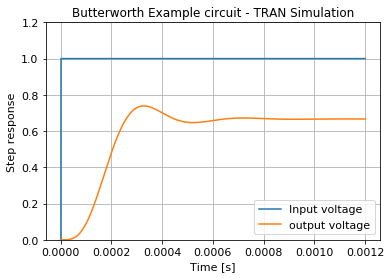

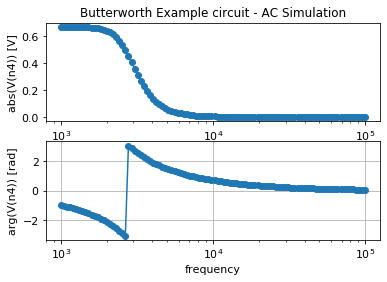

In [32]:
import pylab as plt
import numpy as np

fig = plt.figure()
plt.title(mycircuit.title + " - TRAN Simulation")
plt.plot(r['tran']['T'], r['tran']['VN1'], label="Input voltage")
#plt.hold(True)
plt.plot(r['tran']['T'], r['tran']['VN4'], label="output voltage")
plt.legend()
#plt.hold(False)
plt.grid(True)
plt.ylim([0,1.2])
plt.ylabel('Step response')
plt.xlabel('Time [s]')
fig.savefig('tran_plot.png')

fig = plt.figure()
plt.subplot(211)
plt.semilogx(r['ac']['f'], np.abs(r['ac']['Vn4']), 'o-')
plt.ylabel('abs(V(n4)) [V]')
plt.title(mycircuit.title + " - AC Simulation")
plt.subplot(212)
plt.grid(True)
plt.semilogx(r['ac']['f'], np.angle(r['ac']['Vn4']), 'o-')
plt.xlabel('frequency')
plt.ylabel('arg(V(n4)) [rad]')
fig.savefig('ac_plot.png')
plt.show()

In [27]:
r['ac']['f']

array([  1000.        ,   1047.61575279,   1097.49876549,   1149.7569954 ,
         1204.50354026,   1261.85688307,   1321.94114847,   1384.88637139,
         1450.8287785 ,   1519.91108295,   1592.28279334,   1668.1005372 ,
         1747.52840001,   1830.7382803 ,   1917.91026167,   2009.23300257,
         2104.90414451,   2205.1307399 ,   2310.12970008,   2420.12826479,
         2535.36449397,   2656.08778295,   2782.55940221,   2915.05306283,
         3053.85550883,   3199.2671378 ,   3351.60265094,   3511.19173422,
         3678.37977183,   3853.52859371,   4037.0172586 ,   4229.24287439,
         4430.62145758,   4641.58883361,   4862.60158007,   5094.13801482,
         5336.69923121,   5590.81018251,   5857.02081806,   6135.90727341,
         6428.07311728,   6734.15065775,   7054.80231072,   7390.72203353,
         7742.63682681,   8111.3083079 ,   8497.53435909,   8902.15085445,
         9326.03346883,   9770.09957299,  10235.31021899,  10722.6722201 ,
        11233.24032978,  